#### Import Important Modules

In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [82]:
#Install the necessary modules and packages
#!pip install wordcloud
from wordcloud import WordCloud,STOPWORDS  #Be VERY CAREFUL, it is "WordCloud" and not "wordcloud" after the import functioin
import re                                  #useful in cleaning and modifying text data

#### Load the dataframes

In [83]:
df_p = pd.read_csv("/content/drive/My Drive/QVI_purchase_behaviour.csv")
df_p.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [84]:
df_t = pd.read_csv("/content/drive/My Drive/QVI_transaction_data.csv")
df_t.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


#### Let's check for missing data

In [85]:
print("df_t.shape","\n" ,df_t.shape, "\n")
print("df_p.shape","\n" ,df_p.shape, "\n")

df_t.shape 
 (264836, 8) 

df_p.shape 
 (72637, 3) 



In [86]:
for i in df_p.columns:
    print(i, sum(df_p[i].isnull()))

LYLTY_CARD_NBR 0
LIFESTAGE 0
PREMIUM_CUSTOMER 0


There is no missing data

In [87]:
for i in df_t.columns:
    print(i, sum(df_t[i].isnull()))

DATE 0
STORE_NBR 0
LYLTY_CARD_NBR 0
TXN_ID 0
PROD_NBR 0
PROD_NAME 0
PROD_QTY 0
TOT_SALES 0


There is no missing data

#### Merge the dataframes

In [88]:
df_chips = pd.merge(df_p,df_t, on = "LYLTY_CARD_NBR", how="inner")
df_chips.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,1000,YOUNG SINGLES/COUPLES,Premium,43390,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,1002,YOUNG SINGLES/COUPLES,Mainstream,43359,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7
2,1003,YOUNG FAMILIES,Budget,43531,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6
3,1003,YOUNG FAMILIES,Budget,43532,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0
4,1004,OLDER SINGLES/COUPLES,Mainstream,43406,1,5,96,WW Original Stacked Chips 160g,1,1.9


#### Let's Check for Anomalies

In [89]:
df_chips[df_chips["PROD_QTY"] >= 50]

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
221625,226000,OLDER FAMILIES,Premium,43331,226,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
221626,226000,OLDER FAMILIES,Premium,43605,226,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


Has this customer bought before this transaction?

In [90]:
df_chips[df_chips["LYLTY_CARD_NBR"] == 226000]


,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
221625,226000,OLDER FAMILIES,Premium,43331,226,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
221626,226000,OLDER FAMILIES,Premium,43605,226,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


This customer has never bought anything other than these 2 transanctions. The number is too great for it to be for personal consumptio so it is probably for commercial use. We will therefore remove this customer from our database

In [91]:
# Removing the customer from our database
anomal = df_chips[df_chips["PROD_QTY"] >= 50].index
df_chips.drop(labels = anomal, inplace = True)

In [92]:
df_chips[df_chips["LYLTY_CARD_NBR"] == 226000]

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES


### PACK SIZE

In [93]:
Pack_size = []
temp = re.compile("([a-zA-Z]+)([0-9]+)")
for i in df_chips["PROD_NAME"]:
  z = str(i)
  res = list(re.findall(r'(\s?)(\d+)', z)[0])
  g = int(res[-1])
  Pack_size.append(g)

In [94]:
df_chips.insert(8, 'PACK_SIZE', Pack_size)
df_chips.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PACK_SIZE,PROD_QTY,TOT_SALES
0,1000,YOUNG SINGLES/COUPLES,Premium,43390,1,1,5,Natural Chip Compny SeaSalt175g,175,2,6.0
1,1002,YOUNG SINGLES/COUPLES,Mainstream,43359,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,150,1,2.7
2,1003,YOUNG FAMILIES,Budget,43531,1,3,52,Grain Waves Sour Cream&Chives 210G,210,1,3.6
3,1003,YOUNG FAMILIES,Budget,43532,1,4,106,Natural ChipCo Hony Soy Chckn175g,175,1,3.0
4,1004,OLDER SINGLES/COUPLES,Mainstream,43406,1,5,96,WW Original Stacked Chips 160g,160,1,1.9


#### Relationship between Packet Size and Price

In [95]:
df_pack_size1 = df_chips.groupby('PACK_SIZE').sum()['TOT_SALES'].sort_values(ascending = False)

# A list of the keys which are the names of the top 10 PACK SIZE
pack_size_key_list1 = list(df_pack_size1[:10].keys())
df_pack_size1[:10]

PACK_SIZE
175    485437.4
150    304288.5
134    177655.5
110    162765.4
170    146673.0
330    136794.3
300    113330.6
165    101360.6
380     75419.6
270     55425.4
Name: TOT_SALES, dtype: float64

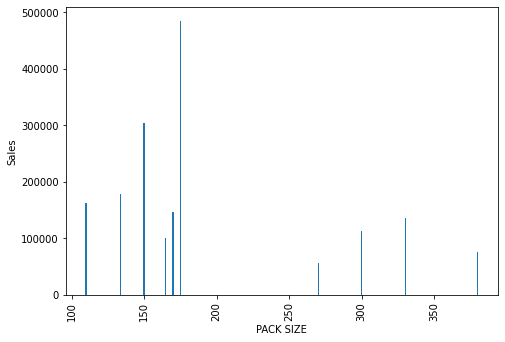

In [96]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(pack_size_key_list1,df_pack_size1[:10])
plt.title('')
plt.xlabel('PACK SIZE')
plt.ylabel('Sales')
plt.xticks(rotation= 'vertical')
plt.show()

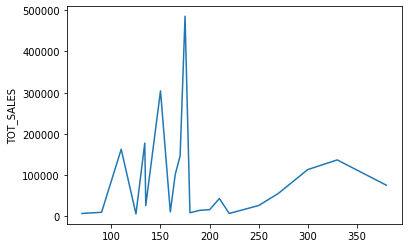

In [120]:
sns.lineplot(x = list(df_pack_size1.keys()), y = df_pack_size1)
plt.show()

175g PACK_SIZE has the most sales

#### What PACK SIZE is bought the most

In [97]:
df_pack_size = df_chips.groupby('PACK_SIZE').sum()['PROD_QTY'].sort_values(ascending = False)

# A list of the keys which are the names of the top 10 PACK SIZE
pack_size_key_list = list(df_pack_size[:10].keys())
pack_size_key_list

[175, 150, 134, 110, 170, 165, 300, 330, 380, 270]

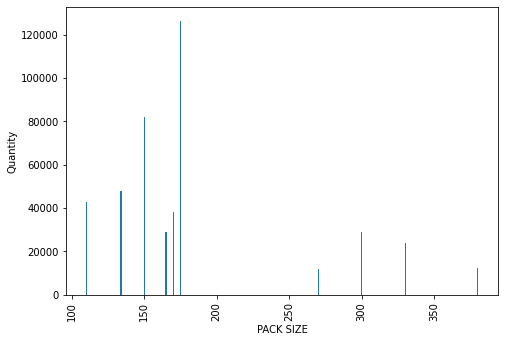

In [98]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(pack_size_key_list,df_pack_size[:10])
plt.title('')
plt.xlabel('PACK SIZE')
plt.ylabel('Quantity')
plt.xticks(rotation= 'vertical')
plt.show()

It looks like 175g PACK SIZE is the most desired pack size

### BRANDS

#### Let's get the names of the Brands

In [121]:
Brands = []
for i in df_chips["PROD_NAME"]:
  z = str(i)
  res = list(re.findall(r'^(\w+)(\b)', z)[0])
  g = res[0]
  Brands.append(g)
  g

In [100]:
df_chips.insert(9, 'BRAND_NAME', Brands)
df_chips.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PACK_SIZE,BRAND_NAME,PROD_QTY,TOT_SALES
0,1000,YOUNG SINGLES/COUPLES,Premium,43390,1,1,5,Natural Chip Compny SeaSalt175g,175,Natural,2,6.0
1,1002,YOUNG SINGLES/COUPLES,Mainstream,43359,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,150,Red,1,2.7
2,1003,YOUNG FAMILIES,Budget,43531,1,3,52,Grain Waves Sour Cream&Chives 210G,210,Grain,1,3.6
3,1003,YOUNG FAMILIES,Budget,43532,1,4,106,Natural ChipCo Hony Soy Chckn175g,175,Natural,1,3.0
4,1004,OLDER SINGLES/COUPLES,Mainstream,43406,1,5,96,WW Original Stacked Chips 160g,160,WW,1,1.9


#### What CHIP BRANDS do customers buy the most of?

In [125]:
df_pop_brands = df_chips.groupby("BRAND_NAME").sum()['PROD_QTY'].sort_values(ascending=False)
brand_name_key_list = list(df_pop_brands[:10].keys())
brand_name_key_list

['Kettle',
 'Smiths',
 'Pringles',
 'Doritos',
 'Thins',
 'RRD',
 'Infuzions',
 'WW',
 'Cobs',
 'Tostitos']

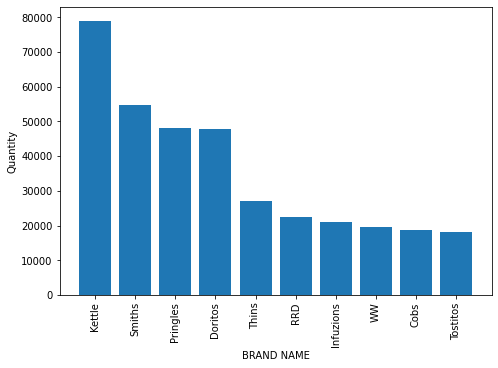

In [126]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(brand_name_key_list,df_pop_brands[:10])
plt.title('')
plt.xlabel('BRAND NAME')
plt.ylabel('Quantity')
plt.xticks(rotation= 'vertical')
plt.show()

#### What CHIP BRANDS do customers spend the most on?

In [103]:
df_brand_sale = df_chips.groupby("BRAND_NAME").sum()['TOT_SALES'].sort_values(ascending=False)
brand_sale_key_list = list(df_brand_sale[:10].keys())
brand_sale_key_list

['Kettle',
 'Smiths',
 'Doritos',
 'Pringles',
 'Old',
 'Thins',
 'Twisties',
 'Tostitos',
 'Infuzions',
 'Cobs']

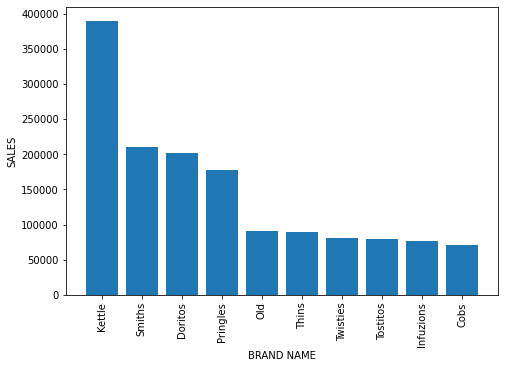

In [104]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(brand_sale_key_list,df_brand_sale[:10])
plt.title('')
plt.xlabel('BRAND NAME')
plt.ylabel('SALES')
plt.xticks(rotation= 'vertical')
plt.show()

#### What Kettle CHIP PRODUCTS are bought the most?

In [127]:
df_chips[df_chips["BRAND_NAME"] == "Kettle"].groupby("PROD_NAME").sum()["PROD_QTY"].sort_values(ascending = False)

PROD_NAME
Kettle Mozzarella   Basil & Pesto 175g      6381
Kettle Tortilla ChpsHny&Jlpno Chili 150g    6309
Kettle 135g Swt Pot Sea Salt                6212
Kettle Sensations   Camembert & Fig 150g    6157
Kettle Sweet Chilli And Sour Cream 175g     6120
Kettle Original 175g                        6064
Kettle Tortilla ChpsBtroot&Ricotta 150g     6037
Kettle Sea Salt     And Vinegar 175g        6035
Kettle Honey Soy    Chicken 175g            6033
Kettle Tortilla ChpsFeta&Garlic 150g        6008
Kettle Sensations   Siracha Lime 150g       5993
Kettle Sensations   BBQ&Maple 150g          5910
Kettle Chilli 175g                          5792
Name: PROD_QTY, dtype: int64

### PURCHASING BEHAVIOUR OF CUSTOMERS

### Customer Distribution for PREMIUM_CUSTOMER and LIFESTAGE

In [134]:
for i in df_p['PREMIUM_CUSTOMER'].unique():
  print(i+" Customers", "\n", df_p[df_p["PREMIUM_CUSTOMER"]==i].groupby("LIFESTAGE").count()['LYLTY_CARD_NBR'].sort_values(ascending=False), "\n")

Premium Customers 
 LIFESTAGE
OLDER SINGLES/COUPLES     4750
RETIREES                  3872
YOUNG SINGLES/COUPLES     2574
YOUNG FAMILIES            2433
MIDAGE SINGLES/COUPLES    2431
OLDER FAMILIES            2274
NEW FAMILIES               588
Name: LYLTY_CARD_NBR, dtype: int64 

Mainstream Customers 
 LIFESTAGE
YOUNG SINGLES/COUPLES     8088
RETIREES                  6479
OLDER SINGLES/COUPLES     4930
MIDAGE SINGLES/COUPLES    3340
OLDER FAMILIES            2831
YOUNG FAMILIES            2728
NEW FAMILIES               849
Name: LYLTY_CARD_NBR, dtype: int64 

Budget Customers 
 LIFESTAGE
OLDER SINGLES/COUPLES     4929
OLDER FAMILIES            4675
RETIREES                  4454
YOUNG FAMILIES            4017
YOUNG SINGLES/COUPLES     3779
MIDAGE SINGLES/COUPLES    1504
NEW FAMILIES              1112
Name: LYLTY_CARD_NBR, dtype: int64 



([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text major ticklabel objects>)

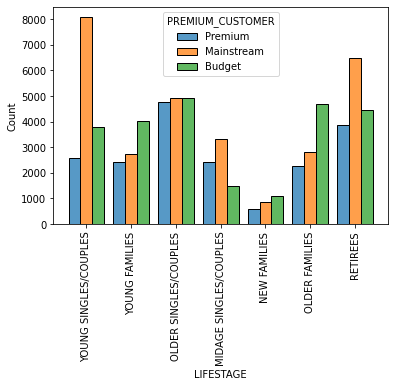

In [175]:
sns.histplot(data=df_p, x="LIFESTAGE", hue="PREMIUM_CUSTOMER", multiple="dodge", shrink=.8)
plt.xticks(rotation= 'vertical')

Older Singles/Couples are the highest Premium Customers

Young Singles/Couples are the highest Mainstream Customers

Older Singles/Couples are also the highest Budget Customers

Retirees are in the top 3 highest subscribers for each subscription.

There are more RETIREES and YOUNG SINGLES/COUPLES in "Mainstream" than any other LIFESTAGE

### LIFESTAGE CUSTOMER ANALYSIS

#### Which LIFESTAGE has the highest number of people?

In [168]:
df_lfstg = df_p.groupby('LIFESTAGE').count()['LYLTY_CARD_NBR'].sort_values(ascending = False)
df_lfstg

LIFESTAGE
RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: LYLTY_CARD_NBR, dtype: int64

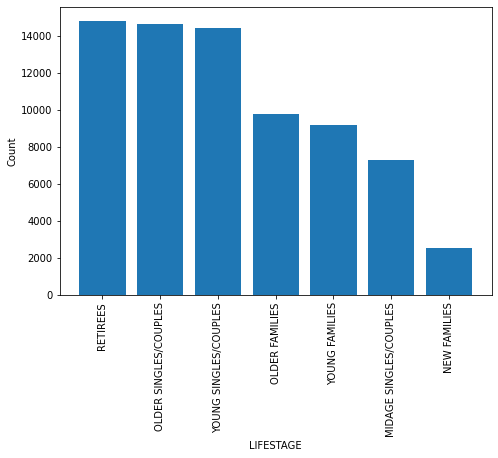

In [172]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(list(df_lfstg.keys()),df_lfstg)
plt.title('')
plt.xlabel('LIFESTAGE')
plt.ylabel('Count')
plt.xticks(rotation= 'vertical')
plt.show()

New Families are the lowest number of lifestage category

while Retirees are the highest number of lifestage category

#### Distribution of Demand across LIFESTAGE

In [ ]:
df_ltsg_dmd = df_chips.groupby("LIFESTAGE").sum()["PROD_QTY"].sort_values(ascending = False)
df_ltsg_dmd

LIFESTAGE
OLDER SINGLES/COUPLES     104203
OLDER FAMILIES             94592
RETIREES                   94166
YOUNG FAMILIES             84561
YOUNG SINGLES/COUPLES      66634
MIDAGE SINGLES/COUPLES     47721
NEW FAMILIES               12847
Name: PROD_QTY, dtype: int64

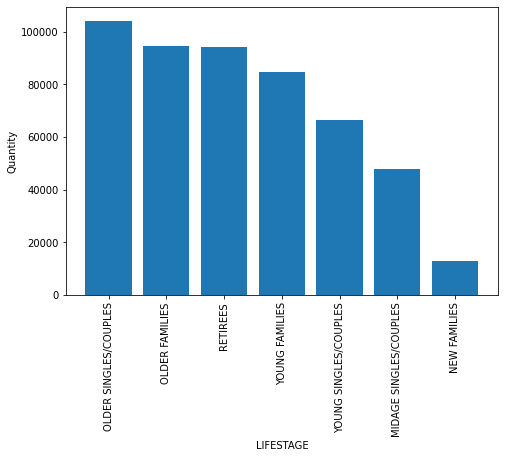

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(list(df_ltsg_dmd.keys()),df_ltsg_dmd)
plt.title('')
plt.xlabel('LIFESTAGE')
plt.ylabel('Quantity')
plt.xticks(rotation= 'vertical')
plt.show()

**TOP 3**

OLDER SINGLES/COUPLES have the highest demand because they have the second highest number of people subscribed [14609] and also because of extra income due to the lack of children.

OLDER FAMILES have the 2nd highest demand which is driven by their children demand for CHIPS.

RETIREES have a higher demand compared to others, due to steady income from their pension and also because it has the highest number of people subscribed [14805]

#### Distribution of Sales across LIFESTAGE

In [199]:
lifestage = df_chips.groupby('LIFESTAGE').sum()['TOT_SALES'].sort_values(ascending = False)

lifestage_keys = list(lifestage.keys())
lifestage_lst = []
for i in list(lifestage.keys()):
  lifestage_lst.append(lifestage[i])

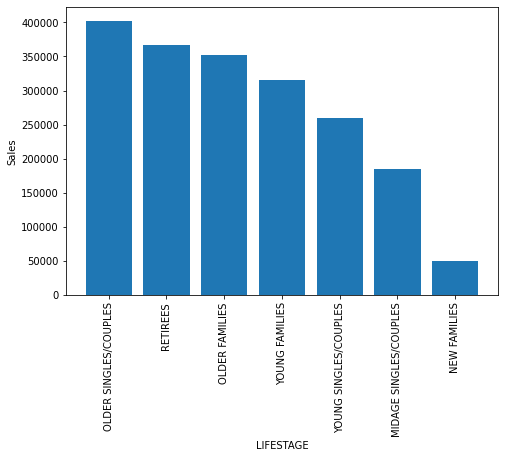

In [200]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(lifestage_keys,lifestage_lst)
plt.title('')
plt.xlabel('LIFESTAGE')
plt.ylabel('Sales')
plt.xticks(rotation= 'vertical')
plt.show()

#### What CHIPS are each LIFESTAGE's highest demand?

In [204]:
for i in df_chips["LIFESTAGE"].unique():
  print(i, "\n", df_chips[df_chips["LIFESTAGE"]==i].groupby("PROD_NAME").sum()['PROD_QTY'].sort_values(ascending=False)[:10], "\n")

YOUNG SINGLES/COUPLES 
 PROD_NAME
Kettle Mozzarella   Basil & Pesto 175g      956
Tostitos Splash Of  Lime 175g               945
Doritos Corn Chips  Cheese Supreme 170g     909
Pringles Mystery    Flavour 134g            906
Kettle Sensations   Camembert & Fig 150g    889
Doritos Corn Chips  Original 170g           889
Tyrrells Crisps     Lightly Salted 165g     887
Smiths Crnkle Chip  Orgnl Big Bag 380g      886
Infuzions BBQ Rib   Prawn Crackers 110g     884
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    884
Name: PROD_QTY, dtype: int64 

YOUNG FAMILIES 
 PROD_NAME
Kettle Original 175g                        1040
Cobs Popd Sea Salt  Chips 110g              1011
Cheezels Cheese 330g                        1006
Kettle Tortilla ChpsHny&Jlpno Chili 150g     999
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g     995
Kettle Tortilla ChpsFeta&Garlic 150g         993
Tostitos Smoked     Chipotle 175g            986
Doritos Corn Chip Mexican Jalapeno 150g      986
Pringles SourCream  Onion 134g      

YOUNG SINGLES/COUPLES have a high demand for                

1.  Kettle Mozzarella Basil & Pesto 175g
2.  Tostitos Splash Of Lime 175g and 
3.  Doritos Corn Chips  Cheese Supreme 170g


YOUNG FAMILES have a high demand for 
1.  Kettle Original 175g
2.  Cobs Popd Sea Salt  Chips 110g and
3.  Cheezels Cheese 330g

OLDER SINGLES/COUPLES have a high demand for
1. Kettle 135g Swt Pot Sea Salt                          
2. Cobs Popd Sea Salt  Chips 110g
3. Thins Chips Seasonedchicken 175g

MIDAGE SINGLES/COUPLES have a high demand for 
1. Infzns Crn Crnchers Tangy Gcamole 110g
2. Cheezels Cheese 330g
3. Twisties Chicken 270g

NEW FAMILIES have a high demand for
1. Kettle Honey Soy    Chicken 175g
2. Cobs Popd Swt/Chlli &Sr/Cream Chips 110g
3. Grain Waves Sweet Chilli 210g

OLD FAMILIES have a high demand for 
1. Smiths Crinkle Chips Salt & Vinegar 330g
2. Old El Paso Salsa   Dip Chnky Tom Ht300g
3. Thins Potato Chips  Hot & Spicy 175g

RETIREES have a high demand for
1. Kettle Mozzarella   Basil & Pesto 175g
2. Thins Chips Light&  Tangy 175g
3. Pringles Barbeque

### PREMIUM_CUSTOMER ANALYSIS

#### What PREMIUM_CUSTOMER has the highest number of subscribers?

In [108]:
df_p.groupby("PREMIUM_CUSTOMER").count()['LYLTY_CARD_NBR'].sort_values(ascending=False)

PREMIUM_CUSTOMER
Mainstream    29245
Budget        24470
Premium       18922
Name: LYLTY_CARD_NBR, dtype: int64

([0, 1, 2], <a list of 3 Text major ticklabel objects>)

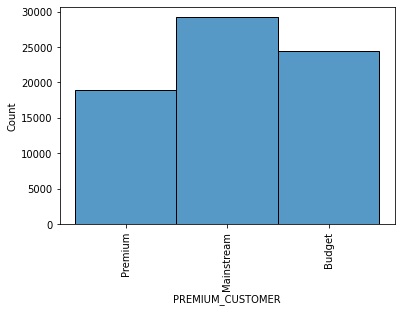

In [109]:
sns.histplot(x="PREMIUM_CUSTOMER",data= df_p, stat="count")
plt.xticks(rotation= 'vertical')

"Mainstream" customers are the largest number of customers

#### Which PREMIUM_CUSTOMER spends the most money?

In [110]:
df_prem = df_chips.groupby("PREMIUM_CUSTOMER").sum()['TOT_SALES'].sort_values(ascending=False)
df_prem

PREMIUM_CUSTOMER
Mainstream    750744.50
Budget        676211.55
Premium       506158.95
Name: TOT_SALES, dtype: float64

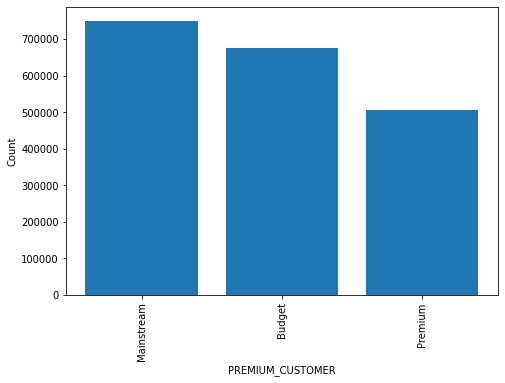

In [111]:
df_prem_key_list = list(df_prem.keys())

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(df_prem_key_list,df_prem)
plt.title('')
plt.xlabel('PREMIUM_CUSTOMER')
plt.ylabel('Count')
plt.xticks(rotation= 'vertical')
plt.show()

"Mainstream" customers spend the most

#### What CHIPS does each PREMIUM_CUSTOMER repetitively buy?
**Customer Loyalty**

In [112]:
for i in df_chips["PREMIUM_CUSTOMER"].unique():
  print(i+" Customers", "\n", df_chips[df_chips["PREMIUM_CUSTOMER"] == i].groupby("PROD_NAME").count()['LYLTY_CARD_NBR'].sort_values(ascending=False)[:10], "\n")

Premium Customers 
 PROD_NAME
Infuzions Thai SweetChili PotatoMix 110g    877
Dorito Corn Chp     Supreme 380g            874
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    865
Tostitos Splash Of  Lime 175g               864
Thins Potato Chips  Hot & Spicy 175g        857
Kettle Mozzarella   Basil & Pesto 175g      856
Pringles SourCream  Onion 134g              851
Kettle Honey Soy    Chicken 175g            849
Thins Chips Light&  Tangy 175g              847
Kettle 135g Swt Pot Sea Salt                846
Name: LYLTY_CARD_NBR, dtype: int64 

Mainstream Customers 
 PROD_NAME
Kettle Tortilla ChpsHny&Jlpno Chili 150g    1360
Tyrrells Crisps     Ched & Chives 165g      1324
Kettle 135g Swt Pot Sea Salt                1316
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    1313
Smiths Crnkle Chip  Orgnl Big Bag 380g      1309
Doritos Corn Chips  Nacho Cheese 170g       1308
Doritos Corn Chip Mexican Jalapeno 150g     1305
Tostitos Splash Of  Lime 175g               1302
Cobs Popd Sea Salt  Chips 11

#### What CHIPS does each PREMIUM_CUSTOMER buy the most?

In [113]:
for i in df_chips["PREMIUM_CUSTOMER"].unique():
  print(i+" Customers", "\n", df_chips[df_chips["PREMIUM_CUSTOMER"] == i].groupby("PROD_NAME").sum()['PROD_QTY'].sort_values(ascending=False)[:10], "\n")

Premium Customers 
 PROD_NAME
Infuzions Thai SweetChili PotatoMix 110g    1685
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    1662
Tostitos Splash Of  Lime 175g               1661
Dorito Corn Chp     Supreme 380g            1656
Kettle Mozzarella   Basil & Pesto 175g      1651
Thins Potato Chips  Hot & Spicy 175g        1638
Pringles SourCream  Onion 134g              1636
Kettle Honey Soy    Chicken 175g            1625
Thins Chips Light&  Tangy 175g              1618
Pringles Barbeque   134g                    1617
Name: PROD_QTY, dtype: int64 

Mainstream Customers 
 PROD_NAME
Kettle Tortilla ChpsHny&Jlpno Chili 150g    2611
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    2511
Cobs Popd Sea Salt  Chips 110g              2502
Tyrrells Crisps     Ched & Chives 165g      2499
Doritos Corn Chip Mexican Jalapeno 150g     2495
Kettle 135g Swt Pot Sea Salt                2493
Smiths Crnkle Chip  Orgnl Big Bag 380g      2487
Tostitos Splash Of  Lime 175g               2484
Doritos Corn Chips  Nach

For "Premium" Customers, you should be advertising 

1. "Infuzions Thai SweetChili PotatoMix 110g"
2. "Cobs Popd Swt/Chlli &Sr/Cream Chips 110g"
3. "Tostitos Splash Of Lime 175g"
4. "Dorito Corn Chp Supreme 380g"
5. "Kettle Mozzarella Basil & Pesto 175g"

For "Mainstream" Customers, you should be advertising 

1. "Kettle Tortilla ChpsHny&Jlpno Chili 150g"    
2. "Cobs Popd Swt/Chlli &Sr/Cream Chips 110g"     
3. "Cobs Popd Sea Salt Chips 110g"    
4. "Tyrrells Crisps Ched & Chives 165g"     
5. "Doritos Corn Chip Mexican Jalapeno 150g"

For "Budget" Customers, you should be advertising   
 
1. "Kettle Mozzarella Basil & Pesto 175g"   
2. "Doritos Corn Chip Southern Chicken 150g"     
3. "Doritos Corn Chips Cheese Supreme 170g"     
4. "Cobs Popd Sea Salt Chips 110g"              
5. "Kettle Tortilla ChpsHny&Jlpno Chili 150g"

#### What CHIPS does each PREMIUM_CUSTOMER spend a lot of money on?

In [ ]:
for i in df_chips["PREMIUM_CUSTOMER"].unique():
  print(i+" Customers", "\n", df_chips[df_chips["PREMIUM_CUSTOMER"] == i].groupby("PROD_NAME").sum()['TOT_SALES'].sort_values(ascending=False)[:10], "\n")

Premium Customers 
 PROD_NAME
Dorito Corn Chp     Supreme 380g            10617.75
Smiths Crnkle Chip  Orgnl Big Bag 380g       9310.20
Smiths Crinkle      Original 330g            9171.30
Cheezels Cheese 330g                         9125.70
Kettle Mozzarella   Basil & Pesto 175g       8915.40
Kettle Honey Soy    Chicken 175g             8775.00
Kettle Original 175g                         8661.60
Smiths Crinkle Chips Salt & Vinegar 330g     8646.90
Kettle Sweet Chilli And Sour Cream 175g      8494.20
Kettle Chilli 175g                           8440.20
Name: TOT_SALES, dtype: float64 

Mainstream Customers 
 PROD_NAME
Dorito Corn Chp     Supreme 380g            15366.0
Smiths Crnkle Chip  Orgnl Big Bag 380g      14673.3
Smiths Crinkle Chips Salt & Vinegar 330g    13965.0
Cheezels Cheese 330g                        13320.9
Kettle Mozzarella   Basil & Pesto 175g      13300.2
Smiths Crinkle      Original 330g           13281.0
Doritos Cheese      Supreme 330g            13189.8
Kettle Ho

The products at the top for each PREMIUM_CUSTOMER is due to it's size, bigger products are more expensive and so they pay more for it

#### What BRAND_NAME does each PREMIUM_CUSTOMER buy a large quantity of?

In [128]:
for i in df_chips["PREMIUM_CUSTOMER"].unique():
  print(i+" Customers", "\n", df_chips[df_chips["PREMIUM_CUSTOMER"] == i].groupby("BRAND_NAME").sum()['PROD_QTY'].sort_values(ascending=False)[:10], "\n")

Premium Customers 
 BRAND_NAME
Kettle       20517
Smiths       14512
Pringles     12617
Doritos      11952
Thins         7109
RRD           6056
Infuzions     5564
WW            5370
Cobs          4849
Tostitos      4802
Name: PROD_QTY, dtype: int64 

Mainstream Customers 
 BRAND_NAME
Kettle       31334
Smiths       20379
Doritos      18947
Pringles     18861
Thins        10402
Infuzions     8192
RRD           8171
Cobs          7464
Twisties      7206
Tostitos      7138
Name: PROD_QTY, dtype: int64 

Budget Customers 
 BRAND_NAME
Kettle       27200
Smiths       19839
Doritos      16808
Pringles     16541
Thins         9418
RRD           8273
Infuzions     7363
WW            7318
Cobs          6258
Twisties      6216
Name: PROD_QTY, dtype: int64 



For each PREMIUM_CUSTOMER subscription, Kettle, Smiths, Doritos and Pringles are the most desired Brands

#### What BRAND_NAME drives the most sales for each PREMIUM_CUSTOMER

In [131]:
for i in df_chips["PREMIUM_CUSTOMER"].unique():
  print(i+" Customers", "\n", df_chips[df_chips["PREMIUM_CUSTOMER"] == i].groupby("BRAND_NAME").sum()['TOT_SALES'].sort_values(ascending=False)[:10], "\n")

Premium Customers 
 BRAND_NAME
Kettle       101355.0
Smiths        55297.8
Doritos       50373.0
Pringles      46668.1
Thins         23459.7
Old           23337.6
Tostitos      21128.8
Twisties      21123.1
Infuzions     20000.2
Cobs          18426.2
Name: TOT_SALES, dtype: float64 

Mainstream Customers 
 BRAND_NAME
Kettle       154477.0
Doritos       80272.9
Smiths        79560.0
Pringles      69785.7
Old           36148.8
Thins         34326.6
Twisties      32439.0
Tostitos      31407.2
Infuzions     29746.4
Cobs          28363.2
Name: TOT_SALES, dtype: float64 

Budget Customers 
 BRAND_NAME
Kettle       134407.8
Smiths        75219.0
Doritos       70893.0
Pringles      61201.7
Old           31298.7
Thins         31066.2
Twisties      27960.0
Tostitos      27253.6
Infuzions     26501.0
RRD           23874.6
Name: TOT_SALES, dtype: float64 

Premium Customers 
 BRAND_NAME
Kettle       101355.0
Smiths        55297.8
Doritos       50373.0
Pringles      46668.1
Thins         23459.7
Ol

For each PREMIUM_CUSTOMER subscription, Kettle, Smiths, Doritos and Pringles Brands drive the most sales

#### What PACKET SIZE does each PREMIUM_CUSTOMER often buy?

In [ ]:
for i in df_chips["PREMIUM_CUSTOMER"].unique():
  print(i+" Customers", "\n", df_chips[df_chips["PREMIUM_CUSTOMER"] == i].groupby("PACK_SIZE").count()['LYLTY_CARD_NBR'].sort_values(ascending=False)[:10], "\n")

Premium Customers 
 PACK_SIZE
175    17654
150    11334
134     6579
110     5831
170     5106
165     4022
300     3955
330     3204
380     1703
210     1642
Name: LYLTY_CARD_NBR, dtype: int64 

Mainstream Customers 
 PACK_SIZE
175    25143
150    16566
134     9903
110     8916
170     7784
300     5866
165     5853
330     4960
380     2562
270     2543
Name: LYLTY_CARD_NBR, dtype: int64 

Budget Customers 
 PACK_SIZE
175    23593
150    15231
134     8620
110     7640
170     7093
165     5422
300     5345
330     4376
380     2151
270     2133
Name: LYLTY_CARD_NBR, dtype: int64 



Every single customer loves to buy the 175g, 150 and 134 pack.



#### What PACKET SIZE does each PREMIUM_CUSTOMER buy in large quantities?

In [ ]:
for i in df_chips["PREMIUM_CUSTOMER"].unique():
  print(i+" Customers", "\n", df_chips[df_chips["PREMIUM_CUSTOMER"] == i].groupby("PACK_SIZE").sum()['PROD_QTY'].sort_values(ascending=False)[:10], "\n")

Premium Customers 
 PACK_SIZE
175    33673
150    21578
134    12617
110    11165
170     9723
165     7636
300     7510
330     6139
380     3234
210     3135
Name: PROD_QTY, dtype: int64 

Mainstream Customers 
 PACK_SIZE
175    47792
150    31523
134    18861
110    17060
170    14792
300    11152
165    11105
330     9431
380     4897
270     4844
Name: PROD_QTY, dtype: int64 

Budget Customers 
 PACK_SIZE
175    45002
150    29073
134    16541
110    14610
170    13573
165    10310
300    10151
330     8429
380     4142
270     4104
Name: PROD_QTY, dtype: int64 



175g is the pack mostly bought by customers, 

#### What PACKET SIZE does each PREMIUM_CUSTOMER spend the most money on?

In [133]:
for i in df_chips["PREMIUM_CUSTOMER"].unique():
  print(i+" Customers", "\n", df_chips[df_chips["PREMIUM_CUSTOMER"] == i].groupby("PACK_SIZE").sum()['TOT_SALES'].sort_values(ascending=False)[:10], "\n")

Premium Customers 
 PACK_SIZE
175    128855.30
150     79349.10
134     46668.10
110     42419.40
170     37246.20
330     34992.30
300     29259.90
165     26583.60
380     19927.95
270     14264.60
Name: TOT_SALES, dtype: float64 

Mainstream Customers 
 PACK_SIZE
175    185230.2
150    118272.7
134     69785.7
110     64828.0
170     57523.3
330     53756.7
300     44492.0
165     38988.6
380     30039.3
270     22282.4
Name: TOT_SALES, dtype: float64 

Budget Customers 
 PACK_SIZE
175    171351.90
150    106666.70
134     61201.70
110     55518.00
170     51903.50
330     48045.30
300     39578.70
165     35788.40
380     25452.35
270     18878.40
Name: TOT_SALES, dtype: float64 



175g, 150g and 134g PACK_SIZE drive the most sales

### CHIPS

#### What are the top 10 chips sold across all the stores and their quantity sold?

In [136]:
popular_chip = df_chips.groupby("PROD_NAME").sum()['PROD_QTY'].sort_values(ascending=False)
popular_chip[:10]

PROD_NAME
Kettle Mozzarella   Basil & Pesto 175g      6381
Kettle Tortilla ChpsHny&Jlpno Chili 150g    6309
Cobs Popd Sea Salt  Chips 110g              6277
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    6256
Tostitos Splash Of  Lime 175g               6234
Tyrrells Crisps     Ched & Chives 165g      6227
Kettle 135g Swt Pot Sea Salt                6212
Infuzions Thai SweetChili PotatoMix 110g    6206
Thins Potato Chips  Hot & Spicy 175g        6185
Doritos Corn Chips  Cheese Supreme 170g     6180
Name: PROD_QTY, dtype: int64

#### What customer segments drives the demand of the top CHIP product, "Kettle Mozzarella   Basil & Pesto 175g"

In [164]:
df_top_chp = df_chips[df_chips["PROD_NAME"] == "Kettle Mozzarella   Basil & Pesto 175g"]
top_chp = df_top_chp.groupby("LIFESTAGE").sum()["PROD_QTY"].sort_values(ascending = False)
top_chp

LIFESTAGE
OLDER SINGLES/COUPLES     1294
RETIREES                  1284
OLDER FAMILIES            1089
YOUNG SINGLES/COUPLES      956
YOUNG FAMILIES             949
MIDAGE SINGLES/COUPLES     627
NEW FAMILIES               182
Name: PROD_QTY, dtype: int64

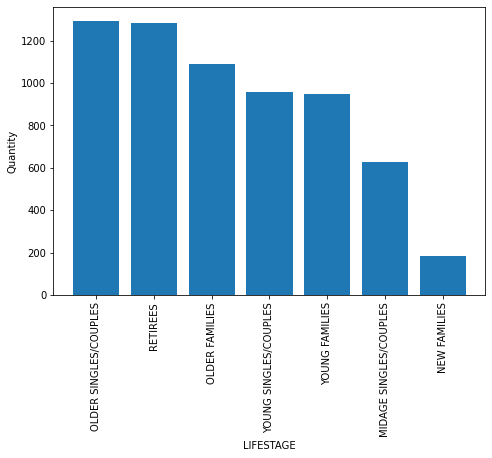

In [165]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(list(top_chp.keys()),top_chp)
plt.title('')
plt.xlabel('LIFESTAGE')
plt.ylabel('Quantity')
plt.xticks(rotation= 'vertical')
plt.show()

#### Distribution of the TOP CHIP demand across the LIFESTAGE

([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text major ticklabel objects>)

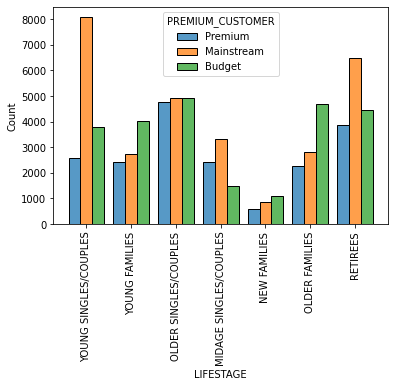

In [192]:
# General distribution of customers across the LIFESTAGE and PREMIUM_CUSTOMER
sns.histplot(data=df_p, x="LIFESTAGE", hue="PREMIUM_CUSTOMER", multiple="dodge", shrink=.8)
plt.xticks(rotation= 'vertical')

Comparing the 2 distributions:

YOUNG SINGLES/COUPLES with the "Mainstream" subscription constitute the major demand because they have a lot of disposable income and also because they are the highest number of subscribers

Followed by OLDER FAMILIES with the "Budget" Subscription, this demand is driven by their children and also because the "Budget" subscription has the highest number of subscribers in the OLDER FAMILIES LIFESTAGE

Followed by RETIREES with "Mainstream" subscription who have a steady flow of income from their pension and are the 2nd highest number of subscribers

([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text major ticklabel objects>)

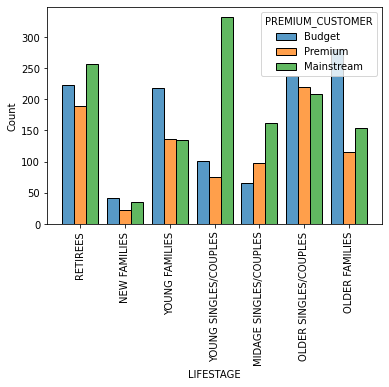

In [191]:
sns.histplot(data=df_top_chp, x="LIFESTAGE", hue="PREMIUM_CUSTOMER", multiple="dodge", shrink=.8)
plt.xticks(rotation= 'vertical')

#### What are the top 10 chips with the highest sales and their total in sales?

In [138]:
popular_chip_2 = df_chips.groupby("PROD_NAME").sum()['TOT_SALES'].sort_values(ascending=False)[:10]
popular_chip_2.head()

PROD_NAME
Dorito Corn Chp     Supreme 380g            39052.0
Smiths Crnkle Chip  Orgnl Big Bag 380g      36367.6
Smiths Crinkle Chips Salt & Vinegar 330g    34804.2
Kettle Mozzarella   Basil & Pesto 175g      34457.4
Smiths Crinkle      Original 330g           34302.6
Name: TOT_SALES, dtype: float64

#### What Lifestage mostly bought the top 10 Chips based on total in sales?

In [194]:
# A list of the keys which are the names of the top 10 products
key_list = list(popular_chip_2[:10].keys())
key_list

['Dorito Corn Chp     Supreme 380g',
 'Smiths Crnkle Chip  Orgnl Big Bag 380g',
 'Smiths Crinkle Chips Salt & Vinegar 330g',
 'Kettle Mozzarella   Basil & Pesto 175g',
 'Smiths Crinkle      Original 330g',
 'Cheezels Cheese 330g',
 'Doritos Cheese      Supreme 330g',
 'Kettle Sweet Chilli And Sour Cream 175g',
 'Kettle Original 175g',
 'Kettle Sea Salt     And Vinegar 175g']

In [196]:
for i in key_list:
  print(i, "\n", df_chips[df_chips["PROD_NAME"]==i].groupby("LIFESTAGE").count()['LYLTY_CARD_NBR'].sort_values(ascending = False), "\n")


Dorito Corn Chp     Supreme 380g 
 LIFESTAGE
OLDER SINGLES/COUPLES     684
RETIREES                  619
OLDER FAMILIES            533
YOUNG FAMILIES            484
YOUNG SINGLES/COUPLES     472
MIDAGE SINGLES/COUPLES    300
NEW FAMILIES               91
Name: LYLTY_CARD_NBR, dtype: int64 

Smiths Crnkle Chip  Orgnl Big Bag 380g 
 LIFESTAGE
OLDER SINGLES/COUPLES     672
RETIREES                  622
OLDER FAMILIES            539
YOUNG FAMILIES            495
YOUNG SINGLES/COUPLES     483
MIDAGE SINGLES/COUPLES    328
NEW FAMILIES               94
Name: LYLTY_CARD_NBR, dtype: int64 

Smiths Crinkle Chips Salt & Vinegar 330g 
 LIFESTAGE
OLDER SINGLES/COUPLES     651
RETIREES                  604
OLDER FAMILIES            589
YOUNG FAMILIES            502
YOUNG SINGLES/COUPLES     465
MIDAGE SINGLES/COUPLES    314
NEW FAMILIES               72
Name: LYLTY_CARD_NBR, dtype: int64 

Kettle Mozzarella   Basil & Pesto 175g 
 LIFESTAGE
RETIREES                  669
OLDER SINGLES/COUPLES     665

"Older Singles/Couples", "Retirees" and "Older Families" are the top 3 purchasers of the top 10 chips except for "Kettle Original 175g" where you the top 3 are "Older Singles/Couples", "Retirees" and "YOUNG FAMILIES" respectively

### STORES

#### What are the top 10 stores with the highest sales in chips and their total in sales?

In [ ]:
df_chips.groupby("STORE_NBR").sum()['TOT_SALES'].sort_values(ascending=False)[:10]

#### What are the top 10 stores with the highest number of chips sold?

In [193]:
df_chips.groupby("STORE_NBR").sum()['PROD_QTY'].sort_values(ascending=False)[:10]

STORE_NBR
226    4001
88     3718
93     3639
165    3602
43     3519
237    3515
40     3499
230    3476
213    3470
58     3463
Name: PROD_QTY, dtype: int64

### DAYS

#### Which days sold the highest number of Chips?

In [ ]:
df_chips.groupby("DATE").sum()['PROD_QTY'].sort_values(ascending=False)[:10]

#### What are the top 10 Days with the highest total in sales of Chips?

In [ ]:
df_chips.groupby("DATE").sum()['TOT_SALES'].sort_values(ascending=False)[:10]